# Homework №1

In [120]:
import numpy as np
import matplotlib.pyplot as plt

import math


In [121]:
f = lambda x: x**2 - 2*x + np.exp(-x)

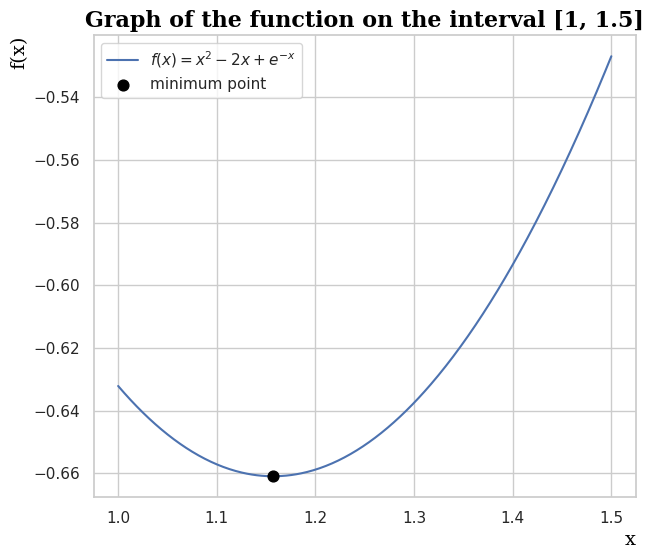

result: (1.157, -0.661)


In [122]:
from scipy.optimize import minimize_scalar

# interval
a, b = 1, 1.5

# minimization [a, b]
result = minimize_scalar(f, bounds=(a, b), method='bounded')

# create array of x values
x_new = np.linspace(a, b, 400)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14 }
title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 16 }


# plotting
fig = plt.figure(figsize=(7, 6))
plt.plot(x_new, f(x_new), label=r'$f(x) = x^2 - 2x + e^{-x}$')
plt.scatter(result.x, result.fun, color='black', marker='o', edgecolor='black', zorder=5, label='minimum point', s=60)
plt.title('Graph of the function on the interval [1, 1.5]', fontdict=title)
plt.xlabel('x', loc="right", fontdict=font)
plt.ylabel('f(x)', loc="top", fontdict=font)
plt.legend()
plt.show()

rounded_x = round(result.x, 3)
rounded_fun = round(result.fun, 3)

print(f"result: {rounded_x, rounded_fun}")


# Dichotomy method


In [123]:
from scipy.misc import derivative

def bisection(f, a, b, epsilon, delta, max_iter):
  n = 1 # iteration number
  while(np.abs(a - b)/2 >= epsilon):

    if (n > max_iter):
      print("iteration limit exceeded \n")
      break

    x1 = (a + b - delta)/2
    x2 = (a + b + delta)/2

    print(f"iteration number {n}: a = {a:.3f}, b = {b:.3f}, f(x) = {(f((a+b)/2)):.5f}, f'(x) = {(derivative(f, (a+b)/2)):.5f}\n")
    n +=1

    if(f(x1) > f(x2)):
      a = x1
    else:
      b = x2

  print(f"answer is found \n extremum: x = {((a + b)/2):.3f}, f(x) = {f((a+b)/2):.3f} \n")

In [124]:
bisection(f, 1, 1.5, 10**(-10), 10**(-10), 25)

iteration number 1: a = 1.000, b = 1.500, f(x) = -0.65100, f'(x) = 0.16330

iteration number 2: a = 1.000, b = 1.250, f(x) = -0.65972, f'(x) = -0.13153

iteration number 3: a = 1.125, b = 1.250, f(x) = -0.65986, f'(x) = 0.01658

iteration number 4: a = 1.125, b = 1.188, f(x) = -0.66092, f'(x) = -0.05729

iteration number 5: a = 1.156, b = 1.188, f(x) = -0.66067, f'(x) = -0.02031

iteration number 6: a = 1.156, b = 1.172, f(x) = -0.66087, f'(x) = -0.03879

iteration number 7: a = 1.156, b = 1.164, f(x) = -0.66091, f'(x) = -0.04804

iteration number 8: a = 1.156, b = 1.160, f(x) = -0.66092, f'(x) = -0.05267

iteration number 9: a = 1.156, b = 1.158, f(x) = -0.66092, f'(x) = -0.05498

iteration number 10: a = 1.156, b = 1.157, f(x) = -0.66092, f'(x) = -0.05614

iteration number 11: a = 1.157, b = 1.157, f(x) = -0.66092, f'(x) = -0.05556

iteration number 12: a = 1.157, b = 1.157, f(x) = -0.66092, f'(x) = -0.05527

iteration number 13: a = 1.157, b = 1.157, f(x) = -0.66092, f'(x) = -0.0551

<ipython-input-123-e972c7522a8c>:14: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  print(f"iteration number {n}: a = {a:.3f}, b = {b:.3f}, f(x) = {(f((a+b)/2)):.5f}, f'(x) = {(derivative(f, (a+b)/2)):.5f}\n")


# Golden ratio method

In [125]:
def golden_ratio(f, a, b, epsilon, max_iter):
  phi = (1 + math.sqrt(5))/2
  n = 1 # iteration number
  x1 = b - (b - a)/phi
  x2 = a + (b - a)/phi

  while(np.abs(a - b)/2 >= epsilon):

    if (n > max_iter):
      print("iteration limit exceeded \n")
      break

    if(f(x1) > f(x2)):
      a = x1
      x1 = x2
      x2 = b - (b - a)/phi
    else:
      b = x2
      x2 = x1
      x1 = a + (b - a)/phi

    print(f"iteration number {n}: a = {a:.3f}, b = {b:.3f}, x1 = {x1:.3f}, x2 = {x2:.3f}, f(x1) = {(f(x1)):.5f}, f(x2) = {(f(x2)):.3f} \n")
    n += 1

  min_point = x1 if f(x1) < f(x2) else x2
  min_value = f(x1) if f(x1) < f(x2) else f (x2)
  print(f"answer is found \n extremum: x = {min_point:.3f}, f(x) = {min_value:.3f} \n")

In [126]:
golden_ratio(f, 1, 1.5, 10**(-10), 25)

iteration number 1: a = 1.000, b = 1.309, x1 = 1.191, x2 = 1.191, f(x1) = -0.65960, f(x2) = -0.660 

iteration number 2: a = 1.000, b = 1.191, x1 = 1.118, x2 = 1.191, f(x1) = -0.65915, f(x2) = -0.660 

iteration number 3: a = 1.118, b = 1.191, x1 = 1.191, x2 = 1.146, f(x1) = -0.65960, f(x2) = -0.661 

iteration number 4: a = 1.191, b = 1.191, x1 = 1.146, x2 = 1.191, f(x1) = -0.66078, f(x2) = -0.660 

answer is found 
 extremum: x = 1.146, f(x) = -0.661 



# Newton's method

In [127]:
from scipy.misc import derivative

def newton(x, f, derivative_f, epsilon, max_iter):
  n = 1 # iteration number

  while(abs(derivative_f(x)) >= epsilon):

    if (n > max_iter):
      print("iteration limit exceeded \n")
      break

    x_i = x - derivative_f(x) / derivative(derivative_f, x)
    print(f"iteration number {n}: x = {x:.3f}, f(x) = {(f(x)):.3f}, f'(x) = {derivative_f(x):.3f}, f''(x) = {derivative(derivative_f, x):.3f} \n")

    x = x_i
    n += 1


  print(f"answer is found \n extremum: x = {x:.3f}, f(x) = {f(x):.3f} \n")

In [128]:
derivative_f = lambda x: 2*x - 2 - np.exp(-x)
newton(1, f, derivative_f, 10**(-10), 25)

iteration number 1: x = 1.000, f(x) = -0.632, f'(x) = -0.368, f''(x) = 2.432 

iteration number 2: x = 1.151, f(x) = -0.661, f'(x) = -0.014, f''(x) = 2.372 

iteration number 3: x = 1.157, f(x) = -0.661, f'(x) = -0.000, f''(x) = 2.370 

iteration number 4: x = 1.157, f(x) = -0.661, f'(x) = -0.000, f''(x) = 2.369 

iteration number 5: x = 1.157, f(x) = -0.661, f'(x) = -0.000, f''(x) = 2.369 

iteration number 6: x = 1.157, f(x) = -0.661, f'(x) = -0.000, f''(x) = 2.369 

answer is found 
 extremum: x = 1.157, f(x) = -0.661 



<ipython-input-127-7c7f2feb11eb>:12: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  x_i = x - derivative_f(x) / derivative(derivative_f, x)
<ipython-input-127-7c7f2feb11eb>:13: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  print(f"iteration number {n}: x = {x:.3f}, f(x) = {(f(x)):.3f}, f'(x) = {derivative_f(x):.3f}, f''(x) = {derivative(derivative_f, x):.3f} \n")
